## Homework 2 - Guided

This homework uses an already cleaned dataset (`cleaned_data.csv`) to build and assess machine learning models for a new AC unit design. The assignment will test your knowledge of scikit-learn models, evaluation metrics, visualizations, and more. All of the questions are designed so that you can complete them with the help of the guided instructions, or by refering to the Day 3 notebook covered in class. 

### **How to Use Google Colab**

To create a cell, press the `+ Code` or `+ Text` button at the bottom-center of an existing cell. This will create a new cell below the one you currently have selected. 

To run code, simply place your cursor in the appropriate code cell, and hit the play button on the left side of the code cell (alternatively, you can use the keyboard shortcut: `Shift + Enter`).

### File Structure

Start by mounting your google drive storage to this notebook so you can access the `cleaned_data.csv` file. To do this, run the cell below. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is how your file structure should look in Google Drive at this point. Note that the current notebook and the provided data file are in a separate ``Homework`` folder.

    DS Project Lab Day 3
    |
    ----------Data
    ----------Notebooks
                 |____________ Day 3
    ----------Homework
                 |____________ Current Notebook
                 |____________ cleaned_data.csv

---

***Replace the question marks*** in each of the cells below with the appropriate values based on the tasks given.

### <font color=red>Task 1: Import Libraries and Load Cleaned Data Set</font>
The Python libraries `pandas` and `numpy` will be used to load and manipulate data during the model building process. Once the model is built, the visualization packages `matplotlib.pyplot` and `seaborn` will be used to assess performance.

1. Import the `pandas` library by using the following syntax: 
```python
import [LIBRARY] as [ALIAS]
```
Use `pd` for the alias name for `pandas`.

2. Also, load `numpy`, `matplotlib.pyplot` and `seaborn`, using `np`, `plt` and `sns` as the respective aliases.

3. With the given file, read in the data using the `pd.read_csv()` function, and save that to a variable named `df`. 

HINT: If you've mounted your google drive correctly, the path for the file in `.read_csv()` will be: _`/content/drive/MyDrive/NAVWAR Data Science Project Lab/DS Project Lab Day 3/Homework/cleaned_data.csv`_

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS Lab 3/DS Project Lab Day 3/Homework/cleaned_data.csv")

### <font color=red>Task 2: Look at Number of Columns/Rows and View Column Data Types </font>

We can look at the the number of data points (rows), features (columns), and feature data types with a single function applied to our DataFrame. Our goals are to understand how much data we have for testing/training and make sure we have only numeric data types.

Use the `.info()` function to examine the structure of the DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CONTROL VALVE 1          12180 non-null  float64
 1   CONTROL VALVE 2          12180 non-null  float64
 2   CONTROL VALVE 3          12180 non-null  float64
 3   LOW PRES                 12180 non-null  float64
 4   HIGH PRES                12180 non-null  float64
 5   BLOW OUT PRES            12180 non-null  float64
 6   BLOW OUT TEMP            12180 non-null  int64  
 7   CONDENSER PRES           12180 non-null  float64
 8   MAXIMUM TEMP             12180 non-null  int64  
 9   RELATIVE TEMP            12180 non-null  int64  
 10  HEAT EXCHANGER CAPACITY  12180 non-null  float64
 11  FIRST PRESSURE LOOP      12180 non-null  float64
 12  SECOND PRSSURE LOOP      12180 non-null  float64
 13  OIL OUTLET TEMP          12180 non-null  float64
 14  OIL INLET TEMP        

Report the information we are interest in below.

In [ ]:
# Short Answer: No need to run this cell
"""
n_data_points = ?    # enter an integer
n_columns = ?        # enter an integer
column_types = "?"   # fill in the string with the column data type(s)
"""

BONUS: Can you guess which column represents our target variable?

In [ ]:
target = "SPECIFIC CURRENT"          # fill in the string with the estimated target variable

### <font color=red>Task 3: Train-Test-Split</font>

We can split our cleaned data into training and testing sets for $X$ and $y$. To do this, first import the `train_test_split` module from `sklearn.model_selection`.

In [ ]:
from sklearn.model_selection import train_test_split

Now split the data into a training set (called `df_train`) and testing set (called `df_test`). Use the `train_test_split` function with a `.7`/`.3` split and set the `random_state` to any integer. The fist input of the function will be the DataFrame `df` that you want to split up.

In [ ]:
df_train, df_test = train_test_split(df, train_size = .7, test_size = .3, random_state = 1)

### <font color=red>Task 4: Separate X and y</font>

As we learned in the lab, we need to prepare for modeling by separating our features ($X$) from our target variable ($y$). Our target variable is represented as the `SPECIFIC CURRENT` column in our dataset. 

Apply the `.pop()` function to the train (`df_train`) and test (`df_test`) DataFrames created in Task 3 to extract the y for training and testing. Then set $X$ equal to the remaining features. Note you should use extended variable names for $X$ and $y$ to indicate whether they are part of the training or testing data set.

HINT: if you answered the BONUS correctly in Task 2, you can reuse the variable `target` as an input to the `pop()` function.

In [ ]:
y_train = df_train.pop(target) 
X_train = df_train
y_test = df_test.pop(target)
X_test = df_test

### <font color=red>Task 5: Identify the Best Model(s)</font>

It is now time to select which predictive model to use.

Based on what we know about our target variable, does a regression based model or a classification based model fit our needs? Provide an explanation for your selection.

In [ ]:
# Short Answer
"""
model_selection = "Regression"  # keep one and delete the other
rationale = "numeric / continuous"   # enter rationale as a string of text
"""

During discussions with our AC maintenance POCs, we learn that the Specific Current has a non-linear relationship with the features in our cleaned data-set. Which model(s) are possible solutions for our predictive capability?

In [ ]:
# Short Answer
"""
model =  "Random Forest" or "Gradient Boost"    # keep one or multiple and remove the incorrect answer(s)
"""

### <font color=red>Task 6: Build and Train a Model</font>

Let's build a random forest regressor model. To do this, start by importing the `RandomForestRegressor` function from `sklearn.ensemble`. Then instantiate a regression object called `rf_reg` with the function you imported. Set the `random_state` input to any integer.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state = 1)

Now train the model with the $X$ and $y$ training objects you created in Task 4. This can be done by applying the `.fit()` function where the inputs for the function are the $X$ and $y$ training DataFrames you created in Task 4. 

In [ ]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

### <font color=red>Task 7: Use Trained Model to Make Predictions</font>

Now that we have a trained model, we can use it to make predictions on unlabeled data. Use the `.predict()` function on your regression object to query your trained model for a prediction on unlabeled data. Use the $X$ testing DataFrame you created in Task 4 as your input to the function. Set `y_pred` as your variable to store a vector of predictions on the test data. 

In [ ]:
y_pred = rf_reg.predict(X_test)

### <font color=red>Task 8: Develop Metrics to Score Model</font>

The `.metrics` module from `sklearn` has built in functions to easily calculate performance metrics on our new model. Start by loading the module.

In [ ]:
import sklearn.metrics as metrics

We can now use the functions in `sklearn.metrics` to measure how accurately our model predicted the labels for our test data. Calculate the mean absolute error, the mean squared error, the root mean squared error, and the $R^2$ score.

The `metrics` module comes with built in functions for calculating the `.mean_squared_error`, `.mean_absolute_error`, and `.r2_score` where the inputs to each of these functions are `y_pred` and the y testing DataFrame you created in Task 4. You can use `np.sqrt()` with your calculated mean squared error to calculate the root mean squared error.

In [ ]:
MAE = metrics.mean_absolute_error(y_pred, y_test)
MSE = metrics.mean_squared_error(y_pred, y_test)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_pred, y_test)

Now print the metrics by entering the variables you created above in the `print()` statement.

In [ ]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("R2 Score: ", R2)

MAE:  0.20990437812513033
MSE:  0.20666016147592547
RMSE:  0.45459890175398077
R2 Score:  0.8728620459227744


### <font color=red>Task 9: Assess Models with Data Visualization</font>

We can also develop visualizations to identify how well our model performs. 

Create two plots:
1. A scatter plot that shows predited `SPECIFIC CURRENT` versus actual `SPECIFIC CURRENT` on the test data. Ensure the scatterplot has a line that indicates a band of perfect predictions. 
2. A histogram of error terms. Add a vertical line indicating the average of residuals. 

Use the seaborn (`sns`) `.scatterplot()` function to create the plot. Place your measurements on the $X$ axis ($y$ testing DataFrame), and your predictions on the $Y$ axis (`y_pred`). Use `"Measured Specific Current"` for your $X$ axis label and `"Predicted Specific Current"` for your $Y$ axis label. Title the plot `"Predicted Vs Actual Value"`.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted Vs Actual Value')

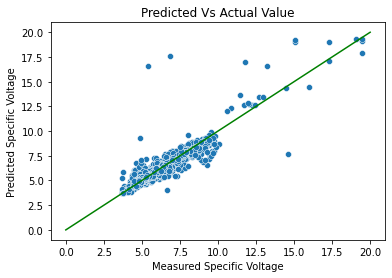

In [ ]:
sns.scatterplot(y_test, y_pred)
plt.plot([0, 20], [0, 20], color='g')
plt.xlabel("Measured Specific Voltage")
plt.ylabel("Predicted Specific Voltage")
plt.title("Predicted Vs Actual Value")

The residuals are the difference between your y testing DataFrame and your y prediction DataFrame. Use seaborn's `.histplot()` function to plot the residuals on a histogram. The vertial line indicating the average of residuals can be created by passing the `residuals.mean()` function as an input to the `.axvline()` function. Title your plot `"Residual Normality & Mean"`.

Text(0.5, 1.0, 'Residual Normality & Mean')

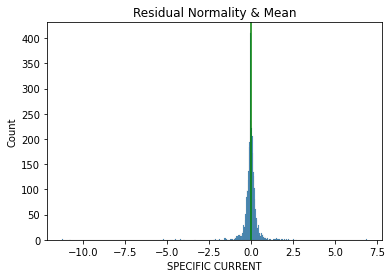

In [ ]:
residuals = y_test - y_pred
sns.histplot(residuals)
plt.axvline(residuals.mean(), color='g')
plt.title("Residual Normality & Mean")

### <font color=red>Task 10: Analyze the Visualizations</font>

Based on your plots above, at what threshold of `SPECIFIC CURRENT` values does our model begin to lose accuracy?

In [ ]:
"""
threshold = 9      # enter a number at which our model loses accuracy
"""

### <font color=red>Task 11: Taking Action</font>

The organization wishes to scale the model you developed for use on operational AC units. What are some key factors to consider for this undertaking? 

In [ ]:
# Short Answer
"""
?
"""